In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from importlib import reload
import os, sys, re, glob, time, pickle, IPython, logging
import scipy.ndimage as ndi
from itertools import islice
import torch
from torch import nn, optim
from torch.nn import functional as F
from torchmore import layers, flex
from torch.utils.data import DataLoader
from webdataset import WebDataset
from ocrlib import ocrmodels as models
from ocrlib import recognition

In [3]:
transforms = [
    lambda x: (torch.tensor(x).float()/255.0).unsqueeze(0),
    lambda s: torch.tensor(recognition.encode_str(s)).long()
]
training = WebDataset("data/words-simple-training.tar", decoder="l8", 
                      extensions="jpg;jpeg;ppm;png txt", transforms=transforms)
testing = WebDataset("data/words-simple-test.tar", decoder="l8", 
                     extensions="jpg;jpeg;ppm;png txt", transforms=transforms)
training_dl = DataLoader(training, batch_size=5, collate_fn=recognition.collate4ocr)
testing_dl = DataLoader(testing, batch_size=20, collate_fn=recognition.collate4ocr)
images, transcripts = next(iter(training_dl))

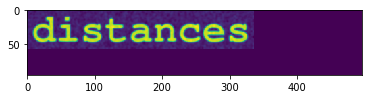

In [4]:
imshow(images[0][0])

In [5]:
model = models.make("lstm2_ctc")
model

# making  lstm2_ctc {}


Sequential(
  (0): Input(BDHW->BDHW torch.float32 (0, 1) cuda:0 [None, 1, None, None])
  (1): Conv2d(1, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (2): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): ReLU()
  (4): Conv2d(100, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (5): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (8): Conv2d(100, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): BatchNorm2d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (10): ReLU()
  (11): Conv2d(200, 200, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (12): BatchNorm2d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (15): Conv2d(200, 300, kernel_size=(

In [39]:
reload(recognition)
trainer = recognition.LineTrainer(model)
trainer.train_batch(images, transcripts)

0.15034402906894684

In [40]:
from torch.utils import tensorboard
os.system("rm -rf runs/recognition")
trainer.writer = tensorboard.SummaryWriter("runs/recognition")

In [41]:
trainer.train(training_dl, 1000)

#         15     0.15
# not saving because self.base is None
#        265     0.22
#        505    0.063
#        745      0.6
#        975    0.087
#       1235    0.069
#       1475     0.22
#       1735      0.1
#       1985     0.19
#       2225     0.18
#       2465    0.074
#       2735     0.28
#       2955    0.088
#       3205     0.21
#       3435     0.07
#       3675     0.37
#       3925     0.19
#       4175     0.19
#       4405     0.19
#       4625     0.22
#       4875     0.12
#       5125     0.12
#       5375    0.053
#       5625    0.036
#       5885     0.18
#       6125      0.3
#       6375    0.088
#       6615     0.11
#       6855     0.12
#       7105     0.15
#       7365     0.13
#       7615    0.043
#       7865    0.053
#       8085    0.089
#       8335     0.21
#       8555     0.21
#       8805    0.049
#       9065    0.087
#       9315     0.15
#       9565    0.085
#       9785     0.21
#      10035    0.082
#      10255    0.097
#      10505   